Programming for Data Science: Final Project 
Name: Letizia 
Surname: Lanza 
ID: VR502321

PART 1: Data Exploration and Data Wrangling 

1. Explore the dataset: your first task is to explore the data as seen in class, finding correlations between attributes and finding some interesting aspects that justify the next parts of the analysis. 

The chosen dataset is available at the following Kaggle's link: https://www.kaggle.com/datasets/sogun3/uspollution 
The dataset is about pollution in the U.S. that has been well documented by the U.S. EPA. 
In particular, this dataset deal with the four major pollutants, which are Nitrogen Dioxide (NO2), Sulphur Dioxide (SO2), Carbon Monoxide (CO) and Ozone (O3), for every day between 2000 and 2016.

The first thing to succesfully carry out this and the following exercises, is to import some libraries as we have seen during the lessons such as: 

In [1]:
import os 
import numpy as np 
import pandas as pd 

The aim of the following command is to upload the dataset in order to allow VS Code checking the data:

In [2]:
pollution_df = pd.read_csv('pollution_us_2000_2016.csv')
pollution_df

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.200,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.200,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.200,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.200,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,24599,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-30,Parts per billion,...,Parts per billion,0.000000,0.0,2,NaN,Parts per million,0.091667,0.100,2,1.0
1746657,24600,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.067714,0.127,0,NaN
1746658,24601,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.100000,0.100,0,1.0
1746659,24602,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,0.000000,0.0,5,NaN,Parts per million,0.067714,0.127,0,NaN


As it can be seen the dataset has 1.746.661 rows and 29 columns. 

The aim of the next code is to eliminate some columns that are not very useful to create interesting stuff:

In [3]:
pollution_df = pollution_df.drop(['Unnamed: 0','State Code','County Code','Site Num','Address','NO2 Units','O3 Units','SO2 Units','CO Units'], axis = 1)
pollution_df

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.200,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.200,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.200,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.200,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,Wyoming,Laramie,Not in a city,2016-03-30,1.083333,1.6,9,1,0.043917,0.048,18,44,0.000000,0.0,2,NaN,0.091667,0.100,2,1.0
1746657,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.067714,0.127,0,NaN
1746658,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.100000,0.100,0,1.0
1746659,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,0.000000,0.0,5,NaN,0.067714,0.127,0,NaN


The number of columns decreased from 29 to 20 as it is required to delete Unnamed: 0 column, State Code column, County Code column, Site Num column,Address column, NO2 Units column, O3 Units column, SO2 Units column and CO Units column.

The DataFrame.info() function prints information about the DataFrame such as number of columns, column labels, column data types, memory usage, range index and the number of cells in each column (non-null values): 

In [4]:
pollution_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   State              object 
 1   County             object 
 2   City               object 
 3   Date Local         object 
 4   NO2 Mean           float64
 5   NO2 1st Max Value  float64
 6   NO2 1st Max Hour   int64  
 7   NO2 AQI            int64  
 8   O3 Mean            float64
 9   O3 1st Max Value   float64
 10  O3 1st Max Hour    int64  
 11  O3 AQI             int64  
 12  SO2 Mean           float64
 13  SO2 1st Max Value  float64
 14  SO2 1st Max Hour   int64  
 15  SO2 AQI            float64
 16  CO Mean            float64
 17  CO 1st Max Value   float64
 18  CO 1st Max Hour    int64  
 19  CO AQI             float64
dtypes: float64(10), int64(6), object(4)
memory usage: 266.5+ MB


The DataFrame.describe() function gives descriptive information about the dataset as it can be seen below: 

In [5]:
pollution_df.describe()

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1.746661e+06,1.746661e+06,1.746661e+06,873338.000000
mean,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,2.612485e-02,3.920331e-02,1.017053e+01,3.605012e+01,1.870364e+00,4.492185e+00,9.664906e+00,7.115945,3.682177e-01,6.201067e-01,7.875026e+00,5.996595
std,9.504814e+00,1.599963e+01,7.877501e+00,1.516280e+01,1.136974e-02,1.534362e-02,4.003144e+00,1.978042e+01,2.760435e+00,7.679866e+00,6.731228e+00,11.937473,3.140231e-01,6.439361e-01,7.978844e+00,5.851836
min,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,2.565220e-01,8.000000e-01,5.000000e+00,1.000000,1.834580e-01,2.920000e-01,0.000000e+00,2.000000
50%,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,2.926250e-01,4.000000e-01,6.000000e+00,5.000000
75%,1.771364e+01,3.570000e+01,2.000000e+01,3.300000e+01,3.391700e-02,4.800000e-02,1.100000e+01,4.200000e+01,2.325000e+00,5.000000e+00,1.400000e+01,9.000000,4.666670e-01,8.000000e-01,1.300000e+01,8.000000
max,1.395417e+02,2.670000e+02,2.300000e+01,1.320000e+02,9.508300e-02,1.410000e-01,2.300000e+01,2.180000e+02,3.216250e+02,3.510000e+02,2.300000e+01,200.000000,7.508333e+00,1.990000e+01,2.300000e+01,201.000000


The DataFrame.describe().T function is used to transpose index and columns of the data frame as follow: 

In [6]:
pollution_df.describe().T

,count,mean,std,min,25%,50%,75%,max
NO2 Mean,1746661.0,12.821930,9.504814,-2.0000,5.750000,10.739130,17.713636,139.541667
NO2 1st Max Value,1746661.0,25.414848,15.999630,-2.0000,13.000000,24.000000,35.700000,267.000000
NO2 1st Max Hour,1746661.0,11.731023,7.877501,0.0000,5.000000,9.000000,20.000000,23.000000
NO2 AQI,1746661.0,23.898217,15.162805,0.0000,12.000000,23.000000,33.000000,132.000000
O3 Mean,1746661.0,0.026125,0.011370,0.0000,0.017875,0.025875,0.033917,0.095083
O3 1st Max Value,1746661.0,0.039203,0.015344,0.0000,0.029000,0.038000,0.048000,0.141000
O3 1st Max Hour,1746661.0,10.170529,4.003144,0.0000,9.000000,10.000000,11.000000,23.000000
O3 AQI,1746661.0,36.050121,19.780423,0.0000,25.000000,33.000000,42.000000,218.000000
SO2 Mean,1746661.0,1.870364,2.760435,-2.0000,0.256522,0.987500,2.325000,321.625000
SO2 1st Max Value,1746661.0,4.492185,7.679866,-2.0000,0.800000,2.000000,5.000000,351.000000


The DataFrame.head() function displays the first 5 rows of the DataFrame by default as below: 

In [7]:
pollution_df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN


The DataFrame.tail() function returns the last 5 rows of the dataframe by default as can be seen: 

In [8]:
pollution_df.tail()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
1746656,Wyoming,Laramie,Not in a city,2016-03-30,1.083333,1.6,9,1,0.043917,0.048,18,44,0.000000,0.0,2,NaN,0.091667,0.100,2,1.0
1746657,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.067714,0.127,0,NaN
1746658,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.100000,0.100,0,1.0
1746659,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,0.000000,0.0,5,NaN,0.067714,0.127,0,NaN
1746660,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,0.000000,0.0,5,NaN,0.100000,0.100,0,1.0


The DataFrame.columns function is an attribute that provides access to the column labels of a DataFrame: 

In [9]:
pollution_df.columns

Index(['State', 'County', 'City', 'Date Local', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

It also can be checked what type the DataFrame is: 

In [10]:
type(pollution_df)

pandas.core.frame.DataFrame

In [11]:
pollution_df.index

RangeIndex(start=0, stop=1746661, step=1)

In [12]:
pollution_df.index.values

array([      0,       1,       2, ..., 1746658, 1746659, 1746660])

In [13]:
type(pollution_df.index.values)

numpy.ndarray

In [14]:
pollution_df.index.size

1746661

In [15]:
pollution_df.index.is_unique

True

In [16]:
pollution_df.index.sort_values(ascending = False)

RangeIndex(start=1746660, stop=-1, step=-1)

In [17]:
pollution_df.sample()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
1162315,North Carolina,Mecklenburg,Charlotte,2011-10-12,8.791667,15.0,7,14,0.012958,0.023,10,19,0.008333,0.1,9,0.0,0.116667,0.2,20,2.0


In [18]:
pollution_df.max()

State                   Wyoming
County                     York
City                       York
Date Local           2016-05-31
NO2 Mean             139.541667
NO2 1st Max Value         267.0
NO2 1st Max Hour             23
NO2 AQI                     132
O3 Mean                0.095083
O3 1st Max Value          0.141
O3 1st Max Hour              23
O3 AQI                      218
SO2 Mean                321.625
SO2 1st Max Value         351.0
SO2 1st Max Hour             23
SO2 AQI                   200.0
CO Mean                7.508333
CO 1st Max Value           19.9
CO 1st Max Hour              23
CO AQI                    201.0
dtype: object

In [19]:
pollution_df.min()

State                    Alabama
County                       Ada
City                 Albuquerque
Date Local            2000-01-01
NO2 Mean                    -2.0
NO2 1st Max Value           -2.0
NO2 1st Max Hour               0
NO2 AQI                        0
O3 Mean                      0.0
O3 1st Max Value             0.0
O3 1st Max Hour                0
O3 AQI                         0
SO2 Mean                    -2.0
SO2 1st Max Value           -2.0
SO2 1st Max Hour               0
SO2 AQI                      0.0
CO Mean                  -0.4375
CO 1st Max Value            -0.4
CO 1st Max Hour                0
CO AQI                       0.0
dtype: object

2. Clean up the dataset: this step encompasses the replacement of null values with appropriate data or their outright removal. During this step you are encouraged to modify the data according to the consideration matured during the exploration.

For checking if there are some null values the DataFrame.isnull() function can be used: 

In [20]:
pollution_df.isnull()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1746657,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1746658,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1746659,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True


As it can be seen, some columns present the "True" word that highlight a null value in that position

Another way to identify how many null values there are in the dataframe is: 

In [21]:
pollution_df.isnull().sum()

State                     0
County                    0
City                      0
Date Local                0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

It is useful to check about the percentage of these information that result having null values: 

In [22]:
print('percentage of SO2 AQI value:', pollution_df['SO2 AQI'].isna().sum()/len(pollution_df))

print('percentage of CO AQI value:', pollution_df['CO AQI'].isna().sum()/len(pollution_df))

percentage of SO2 AQI value: 0.49975753738132356
percentage of CO AQI value: 0.49999570609293964


In [23]:
SO2_AQI = pollution_df['SO2 AQI'].mean()
pollution_df['SO2 AQI'].fillna(SO2_AQI, inplace = True)

/var/folders/nt/j3zdw65j5ys5rx0l1vhss5y40000gn/T/ipykernel_3042/3128971654.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pollution_df['SO2 AQI'].fillna(SO2_AQI, inplace = True)


In [24]:
CO_AQI = pollution_df['CO AQI'].mode()
pollution_df['CO AQI'].fillna(CO_AQI, inplace = True)

/var/folders/nt/j3zdw65j5ys5rx0l1vhss5y40000gn/T/ipykernel_3042/2183739184.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pollution_df['CO AQI'].fillna(CO_AQI, inplace = True)


In this case, deleting the SO2 AQI column and the CO AQI column, which have null values, did not alterate the structure of the dataset in any way. In fact the Air Quality Index is a marginal column in this analysis. 

In [25]:
pollution_df.dropna(inplace = True)
pollution_df

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.000000,1.145833,4.2,21,3.0
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.000000,0.878947,2.2,23,25.0
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,7.115945,0.878947,2.2,23,25.0
5,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.000000,1.066667,2.3,0,26.0
7,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.937500,2.6,23,7.115945,1.066667,2.3,0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746652,Wyoming,Laramie,Not in a city,2016-03-29,2.564706,3.6,6,3,0.028000,0.040,23,37,0.120000,0.4,8,7.115945,0.006667,0.1,0,1.0
1746654,Wyoming,Laramie,Not in a city,2016-03-30,1.083333,1.6,9,1,0.043917,0.048,18,44,0.016667,0.1,0,0.000000,0.091667,0.1,2,1.0
1746656,Wyoming,Laramie,Not in a city,2016-03-30,1.083333,1.6,9,1,0.043917,0.048,18,44,0.000000,0.0,2,7.115945,0.091667,0.1,2,1.0
1746658,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.000000,0.100000,0.1,0,1.0


In [26]:
pollution_df.shape

(873339, 20)

Having delete the null rows, the size of the dataset is 20 columns and 436.876 rows. 

Now it is valuable to check if all the null values are deleted correctly, using again the same code as above:

In [27]:
pollution_df.isnull().sum()

State                0
County               0
City                 0
Date Local           0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
dtype: int64

The code worked correclty 

3. Show some interesting plots: an essential skill of a data scientist is being able to show the important information by using easily understandable graphs. Use the libraries introduced in class to show case some interesting aspects of the dataset. 
An additional 2 points can be awarded for code cleanliness

In this case, it is important to recall three of the previous libraries that we import at the beginning, such as: 

In [28]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

In [29]:
pollution_phoenix = pollution_df.loc[pollution_df['City'] == 'Phoenix']

In [30]:
pollution_phoenix = pollution_phoenix.iloc[np.arange(3, len(pollution_phoenix), 4)]
pollution_phoenix
#potrei fare la media di ogni pollutants di ogni anno e poi vedere se supera il livello massimo oppure no "consentito"
#potrei vedere la città che in assoluto ha i più alti livelli per ogni pollutants e confrontarlo con il valore più alto di phoenix
 

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
5,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.000000,1.066667,2.3,0,26.0
13,Arizona,Maricopa,Phoenix,2000-01-04,40.260870,74.0,8,72,0.014167,0.033,9,28,7.083333,16.0,8,23.000000,1.829167,3.0,23,34.0
21,Arizona,Maricopa,Phoenix,2000-01-06,39.950000,73.0,8,71,0.011750,0.025,10,21,6.761905,17.0,7,24.000000,2.308333,3.6,9,41.0
29,Arizona,Maricopa,Phoenix,2000-01-08,29.666667,41.0,0,39,0.009750,0.020,10,17,8.250000,18.0,0,26.000000,2.787500,5.1,2,57.0
37,Arizona,Maricopa,Phoenix,2000-01-10,37.666667,70.0,20,68,0.008458,0.015,9,13,9.958333,21.0,20,30.000000,2.179167,3.7,23,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722936,Arizona,Maricopa,Phoenix,2016-03-18,18.700000,38.9,22,36,0.030125,0.050,11,46,0.112500,0.7,2,7.115945,0.562500,1.1,2,13.0
1722944,Arizona,Maricopa,Phoenix,2016-03-20,16.270833,43.8,20,41,0.028500,0.055,11,51,0.400000,0.8,2,7.115945,0.525000,1.0,1,11.0
1722952,Arizona,Maricopa,Phoenix,2016-03-22,9.383333,31.4,7,29,0.037792,0.048,10,44,0.062500,0.4,8,7.115945,0.300000,0.4,7,5.0
1722960,Arizona,Maricopa,Phoenix,2016-03-24,20.195833,41.0,21,39,0.022625,0.049,11,45,0.200000,0.6,11,7.115945,0.458333,0.6,5,7.0


import pandas as pd 
import numpy as np 
from datetime import datetime 
pollution_phoenix = pd.Series(['2000-01-04', np.datetime64('2000-01-08'), datetime(2000-01-12)])
pollution_phoenix 
pollution_phoenix = pd.to_datetime(pollution_phoenix)
pollution_phoenix
pollution_phoenix_1 = pd.date_range('2000-01-04, periods = , freq = '')
pollution_phoenix_1

top = plt.subplot2grid((4,1), (0,0), rowspan = , colspan = )
top.plot(pollution_phoenix.index, pollution_phoenix[''])

bottom = plt.subplot2grid((4,1), (0,0), rowspan = , colspan = )
bottom.plot(pollution_phoenix.index, pollution_phoenix[''])

plt.gcf().set_size_inches(15,8)

In [31]:
pollution_phoenix['NO2 Mean']

5          22.958333
13         40.260870
21         39.950000
29         29.666667
37         37.666667
             ...    
1722936    18.700000
1722944    16.270833
1722952     9.383333
1722960    20.195833
1722968    14.579167
Name: NO2 Mean, Length: 4739, dtype: float64

174


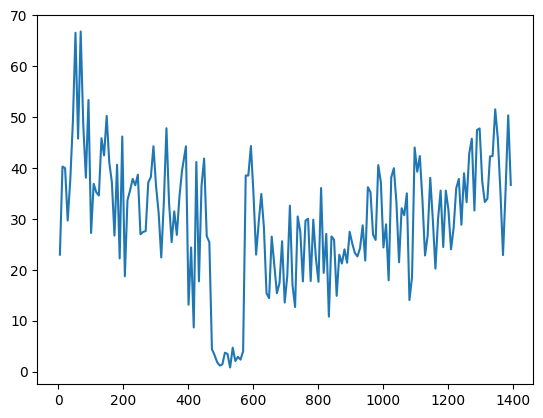

pandas.core.series.Series

In [32]:
pollution_phoenix = pollution_phoenix.loc[pollution_phoenix['Date Local'] <= '2001-01-01']
print(len(pollution_phoenix))
plt.figure
plt.plot(pollution_phoenix['NO2 Mean'], label = '')
plt.show()
type(pollution_phoenix['Date Local'])

In [33]:
pollution_phoenix['O3 Mean']

5       0.013375
13      0.014167
21      0.011750
29      0.009750
37      0.008458
          ...   
1361    0.009583
1369    0.016292
1377    0.008208
1385    0.005125
1393    0.011263
Name: O3 Mean, Length: 174, dtype: float64

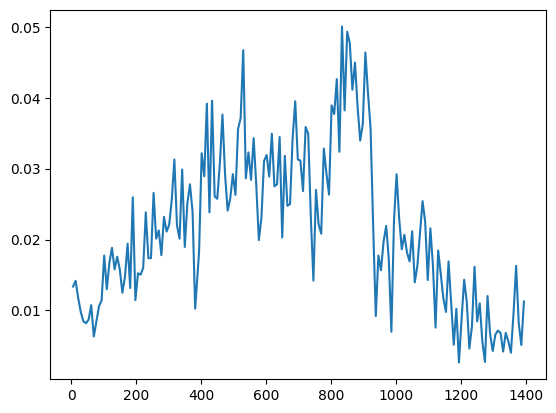

In [34]:
plt.figure
plt.plot(pollution_phoenix['O3 Mean'], label = '')
plt.show()

In [35]:
pollution_phoenix['SO2 Mean']

5       1.958333
13      7.083333
21      6.761905
29      8.250000
37      9.958333
          ...   
1361    4.916667
1369    1.750000
1377    3.458333
1385    6.708333
1393    5.291667
Name: SO2 Mean, Length: 174, dtype: float64

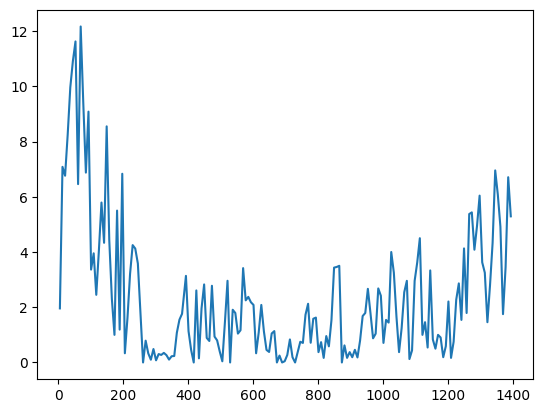

In [36]:
plt.figure
plt.plot(pollution_phoenix['SO2 Mean'], label = '')
plt.show()

In [37]:
pollution_phoenix['CO Mean']

5       1.066667
13      1.829167
21      2.308333
29      2.787500
37      2.179167
          ...   
1361    1.995833
1369    1.916667
1377    1.029167
1385    2.258333
1393    1.800000
Name: CO Mean, Length: 174, dtype: float64

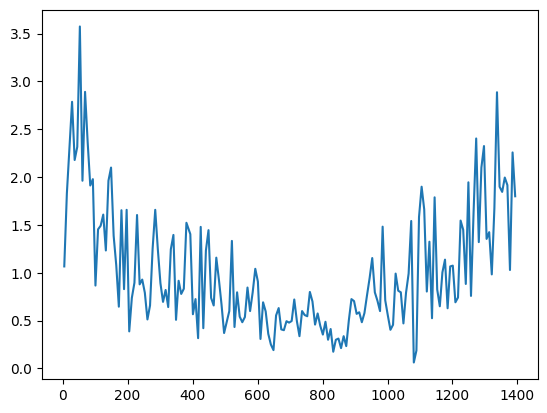

In [38]:
plt.figure
plt.plot(pollution_phoenix['CO Mean'], label = '')
plt.show()

A conclusion that can be drawn from these 4 line graphs is that they don't make sense, in fact the problem is that there are too many data and too many data provide no information and so are unuseful. 

In [39]:
import pandas as pd

In [40]:
NO2_freq = pollution_phoenix.groupby(['NO2 Mean']).count()
NO2_freq

,State,County,City,Date Local,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
NO2 Mean,,,,,,,,,,,,,,,,,,,
0.800000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.181818,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.383333,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.854167,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2.072727,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50.318182,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
51.500000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
53.333333,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [41]:
O3_freq = pollution_phoenix.groupby(['O3 Mean']).count()
O3_freq

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
O3 Mean,,,,,,,,,,,,,,,,,,,
0.002667,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.002750,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.004042,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.004208,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.004292,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.046375,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.046708,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.047667,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [42]:
SO2_freq = pollution_phoenix.groupby(['SO2 Mean']).count()
SO2_freq

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
SO2 Mean,,,,,,,,,,,,,,,,,,,
0.000000,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
0.043478,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.045455,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.078261,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.100000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.391304,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9.958333,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10.916667,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [43]:
CO_freq = pollution_phoenix.groupby(['CO Mean']).count()
CO_freq

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO 1st Max Value,CO 1st Max Hour,CO AQI
CO Mean,,,,,,,,,,,,,,,,,,,
0.062500,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.175000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.187500,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.191667,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.212500,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.404167,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2.787500,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2.887500,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [44]:
#per ricreare una tabella che mi interessa phoenix_pollution.pivot_table(phoenix_pollution[:50], values = '', index=['',''])

In [45]:
#usando phoenix_pollution.groupby(by = ).mean() potrei capire i valori medi di ogni pollutant ? 
#se voglio ordinare di nuovo i valori phoenix_pollution.groupby(by = ).mean().sort_values(by = )

In [46]:
pollution_phoenix.sort_values(by = 'NO2 Mean') #se voglio fare in ordine decrescente devo aggiungere , ascending = False 
#se voglio passare più colonne, metto (by = [ .....])

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
529,Arizona,Maricopa,Phoenix,2000-05-16,0.800000,1.9,4,1,0.046708,0.057,12,48,0.000000,0.0,0,0.0,0.433333,0.6,0,7.0
497,Arizona,Maricopa,Phoenix,2000-05-08,1.181818,4.7,22,4,0.029222,0.055,10,47,0.400000,3.0,20,4.0,0.370588,0.5,9,6.0
505,Arizona,Maricopa,Phoenix,2000-05-10,1.383333,3.4,4,3,0.026292,0.038,10,32,0.043478,1.0,8,1.0,0.487500,0.8,0,9.0
489,Arizona,Maricopa,Phoenix,2000-05-06,1.854167,4.3,1,4,0.025792,0.046,11,39,0.800000,4.0,1,6.0,0.670833,1.2,4,14.0
545,Arizona,Maricopa,Phoenix,2000-05-24,2.072727,3.8,16,3,0.032292,0.055,10,47,1.791667,7.0,5,10.0,0.541667,1.0,9,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,Arizona,Maricopa,Phoenix,2000-12-29,50.318182,75.0,23,73,0.005125,0.010,9,8,6.708333,17.0,23,24.0,2.258333,3.6,23,41.0
1345,Arizona,Maricopa,Phoenix,2000-12-19,51.500000,86.0,9,85,0.005667,0.012,9,10,6.954545,18.0,22,26.0,1.900000,3.6,23,41.0
93,Arizona,Maricopa,Phoenix,2000-01-24,53.333333,77.0,21,76,0.011417,0.023,10,19,9.083333,18.0,21,26.0,1.979167,3.3,1,38.0
53,Arizona,Maricopa,Phoenix,2000-01-14,66.541667,124.0,10,105,0.008708,0.018,8,15,11.625000,29.0,8,41.0,3.575000,5.3,1,59.0


In [47]:
pollution_phoenix.sort_values(by = 'O3 Mean')

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
1193,Arizona,Maricopa,Phoenix,2000-11-06,35.529412,46.0,17,43,0.002667,0.008,9,7,0.590909,3.0,21,4.0,1.066667,1.9,23,22.0
1273,Arizona,Maricopa,Phoenix,2000-12-01,45.739130,61.0,22,58,0.002750,0.006,7,5,5.434783,11.0,0,16.0,2.404167,4.2,1,48.0
1353,Arizona,Maricopa,Phoenix,2000-12-21,45.791667,70.0,19,68,0.004042,0.007,8,6,6.083333,15.0,22,21.0,1.845833,3.4,23,39.0
1329,Arizona,Maricopa,Phoenix,2000-12-15,42.250000,67.0,21,65,0.004208,0.011,10,9,2.791667,9.0,21,13.0,1.675000,2.6,23,30.0
1297,Arizona,Maricopa,Phoenix,2000-12-07,47.750000,73.0,1,71,0.004292,0.010,9,8,6.041667,14.0,20,20.0,2.325000,4.3,2,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,Arizona,Maricopa,Phoenix,2000-08-24,25.142857,52.0,6,49,0.046375,0.073,11,93,0.190476,1.0,6,1.0,0.570833,0.8,0,9.0
529,Arizona,Maricopa,Phoenix,2000-05-16,0.800000,1.9,4,1,0.046708,0.057,12,48,0.000000,0.0,0,0.0,0.433333,0.6,0,7.0
857,Arizona,Maricopa,Phoenix,2000-08-12,14.875000,27.0,22,25,0.047667,0.074,11,97,3.458333,4.0,13,6.0,0.212500,0.3,21,3.0
849,Arizona,Maricopa,Phoenix,2000-08-10,25.869565,62.0,23,60,0.049292,0.088,12,132,3.434783,9.0,22,13.0,0.312500,0.6,23,7.0


In [48]:
pollution_phoenix.sort_values(by = 'SO2 Mean')

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
729,Arizona,Maricopa,Phoenix,2000-07-09,12.666667,28.0,23,26,0.034917,0.051,11,43,0.000000,0.0,0,0.0,0.337500,0.5,1,6.0
689,Arizona,Maricopa,Phoenix,2000-06-29,25.600000,41.0,5,39,0.039500,0.062,11,58,0.000000,0.0,0,0.0,0.494118,0.6,8,7.0
673,Arizona,Maricopa,Phoenix,2000-06-25,15.375000,41.0,22,39,0.025000,0.048,11,41,0.000000,0.0,0,0.0,0.408333,0.7,2,8.0
873,Arizona,Maricopa,Phoenix,2000-08-16,21.208333,43.0,6,41,0.044958,0.075,11,100,0.000000,0.0,0,0.0,0.233333,0.4,8,5.0
529,Arizona,Maricopa,Phoenix,2000-05-16,0.800000,1.9,4,1,0.046708,0.057,12,48,0.000000,0.0,0,0.0,0.433333,0.6,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Arizona,Maricopa,Phoenix,2000-01-20,48.357143,65.0,0,63,0.008500,0.016,10,14,9.391304,17.0,21,24.0,2.366667,4.1,1,47.0
37,Arizona,Maricopa,Phoenix,2000-01-10,37.666667,70.0,20,68,0.008458,0.015,9,13,9.958333,21.0,20,30.0,2.179167,3.7,23,42.0
45,Arizona,Maricopa,Phoenix,2000-01-12,49.125000,81.0,21,80,0.008208,0.014,9,12,10.916667,26.0,21,37.0,2.316667,4.2,0,48.0
53,Arizona,Maricopa,Phoenix,2000-01-14,66.541667,124.0,10,105,0.008708,0.018,8,15,11.625000,29.0,8,41.0,3.575000,5.3,1,59.0


In [49]:
pollution_phoenix.sort_values(by = 'CO Mean')

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
1081,Arizona,Maricopa,Phoenix,2000-10-09,14.041667,30.0,18,28,0.025417,0.035,8,30,0.125000,1.0,9,1.0,0.062500,0.1,6,1.0
833,Arizona,Maricopa,Phoenix,2000-08-06,10.791667,22.0,3,21,0.050042,0.068,10,77,0.583333,1.0,5,1.0,0.175000,0.2,0,2.0
1089,Arizona,Maricopa,Phoenix,2000-10-11,18.590909,47.0,22,44,0.022500,0.033,10,28,0.437500,1.0,0,1.0,0.187500,0.5,23,6.0
649,Arizona,Maricopa,Phoenix,2000-06-19,14.409091,24.0,22,23,0.020292,0.035,10,30,0.380952,2.0,18,3.0,0.191667,0.4,10,5.0
857,Arizona,Maricopa,Phoenix,2000-08-12,14.875000,27.0,22,25,0.047667,0.074,11,97,3.458333,4.0,13,6.0,0.212500,0.3,21,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,Arizona,Maricopa,Phoenix,2000-12-01,45.739130,61.0,22,58,0.002750,0.006,7,5,5.434783,11.0,0,16.0,2.404167,4.2,1,48.0
29,Arizona,Maricopa,Phoenix,2000-01-08,29.666667,41.0,0,39,0.009750,0.020,10,17,8.250000,18.0,0,26.0,2.787500,5.1,2,57.0
1337,Arizona,Maricopa,Phoenix,2000-12-17,42.333333,68.0,22,66,0.006833,0.014,9,12,4.333333,9.0,1,13.0,2.887500,5.0,5,56.0
69,Arizona,Maricopa,Phoenix,2000-01-18,66.791667,101.0,22,101,0.006333,0.010,11,8,12.166667,23.0,22,33.0,2.891667,4.9,2,55.0
